In [ ]:
import torch
from torch import nn

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
!unzip /content/pizza_steak_sushi.zip # Unzippin the files

Archive:  /content/pizza_steak_sushi.zip
   creating: test/
   creating: train/
   creating: test/pizza/
   creating: test/steak/
   creating: test/sushi/
  inflating: test/steak/296375.jpg   
  inflating: test/steak/354513.jpg   
  inflating: test/steak/690177.jpg   
  inflating: test/steak/1882831.jpg  
  inflating: test/steak/894825.jpg   
  inflating: test/steak/3424937.jpg  
  inflating: test/steak/2117351.jpg  
  inflating: test/steak/2144308.jpg  
  inflating: test/steak/502076.jpg   
  inflating: test/steak/100274.jpg   
  inflating: test/steak/1285886.jpg  
  inflating: test/steak/1302563.jpg  
  inflating: test/steak/966174.jpg   
  inflating: test/steak/3873283.jpg  
  inflating: test/steak/27415.jpg    
  inflating: test/steak/1868005.jpg  
  inflating: test/steak/1627703.jpg  
  inflating: test/steak/673127.jpg   
  inflating: test/steak/1016217.jpg  
  inflating: test/sushi/479711.jpg   
  inflating: test/sushi/46797.jpg    
  inflating: test/sushi/2521706.jpg  
  inflati

In [ ]:
# Visualizing a random image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from google.colab.patches import cv2_imshow
file_names=os.listdir("/content/test/pizza")
print(file_names)

['2111981.jpg', '3092704.jpg', '3475871.jpg', '2871261.jpg', '2508636.jpg', '1503858.jpg', '2236338.jpg', '540882.jpg', '416067.jpg', '648055.jpg', '2019408.jpg', '971934.jpg', '714866.jpg', '2003290.jpg', '195160.jpg', '930553.jpg', '309892.jpg', '194643.jpg', '398345.jpg', '2218680.jpg', '2124579.jpg', '1687143.jpg', '1152100.jpg', '344397.jpg', '1925494.jpg']


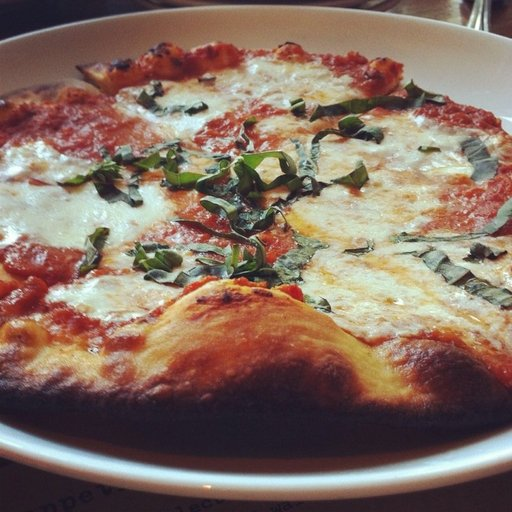

In [ ]:
sample_image=cv2.imread("/content/test/pizza/2019408.jpg")
cv2_imshow(sample_image)

# Turning Images into tensors..

In [ ]:
# Converting Images into tensors....
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [ ]:
stack=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor()
])
# The random flip that we have used here is a kind of data augmentation technique which improves the robestness in the training data..

In [ ]:
from PIL import Image
img=Image.open("/content/test/pizza/2019408.jpg")

In [ ]:
transformed_image=stack(img).permute(1,2,0) # Transforming the channels of the image for matplotlib

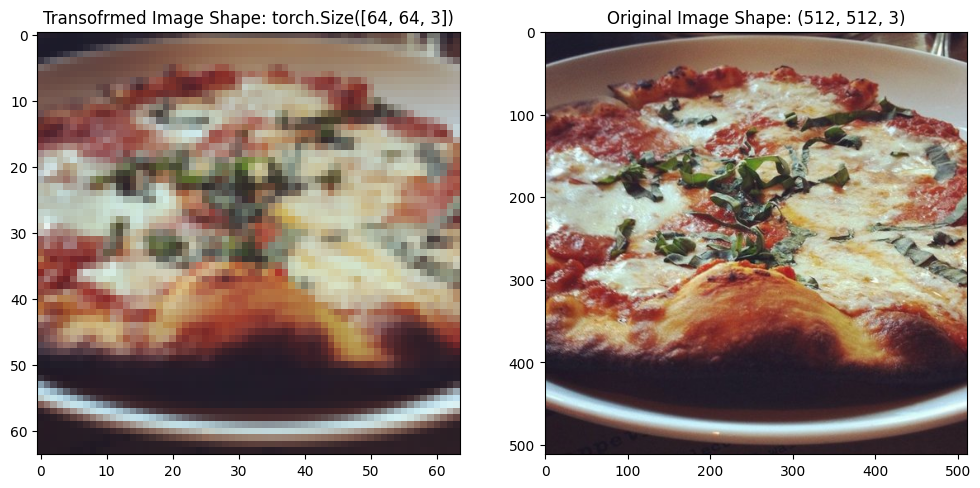

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(transformed_image)
plt.title(f"Transofrmed Image Shape: {transformed_image.shape}")
plt.subplot(1,2,2)
plt.imshow(img)
plt.title(f"Original Image Shape: {sample_image.shape}")
plt.show()

In [ ]:
# Getting the path of all the images
all_images=[]
for i in os.listdir("/content/train/pizza"):
  all_images.append(stack(Image.open("/content/train/pizza/"+i)))
for j in os.listdir("/content/train/steak"):
  all_images.append(stack(Image.open("/content/train/steak/"+j)))
for k in os.listdir("/content/train/sushi"):
  all_images.append(stack(Image.open("/content/train/sushi/"+k)))

In [ ]:
labels=[0 for i in range(len(os.listdir("/content/train/pizza")))]+[1 for i in range(len(os.listdir("/content/train/steak")))]+[2 for i in range(len(os.listdir("/content/train/sushi")))]

In [ ]:
class_names=["pizza","steak","sushi"]

# Turning Images to Data Loader

In [ ]:
labels=[torch.tensor(label) for label in labels]

<ipython-input-31-54a356cd05a3>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels=[torch.tensor(label) for label in labels]


In [ ]:
dataset=torch.utils.data.TensorDataset(torch.stack(all_images),torch.stack(labels))

In [ ]:
dataloader=DataLoader(dataset,batch_size=32,shuffle=True)

In [ ]:
type(dataloader) # DataLoader is made.

torch.utils.data.dataloader.DataLoader

tensor(0)


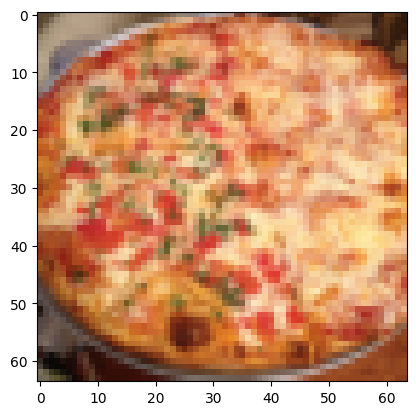

In [ ]:
# Checking the data loader
images,la=next(iter(dataloader))
plt.imshow(images[1].permute(1,2,0))
print(la[1])

tensor([0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 2, 1, 1])


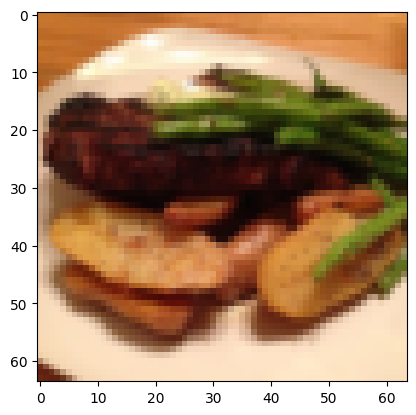

In [ ]:
# Checking the data loader
images,la=next(iter(dataloader))
plt.imshow(images[11].permute(1,2,0))
print(la)

# Modeling- Bulding a MOdel

In [ ]:
# Bulding Tiny-VGG
class TinyVGG(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,out_features=output_shape)

    )
  # Defining Forward Pass
  def forward(self,x):
    x=self.block_1(x)
    x=self.block_2(x)
    x=self.classifier(x)
    return x
# Creating an object for the class
model_0=TinyVGG(input_shape=3,hidden_units=10,output_shape=3).to(device)
model_0


TinyVGG(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# Checking on a single image how the model is performing
test_image=Image.open("/content/test/steak/1285886.jpg")
test_image=stack(test_image)
model_0.eval()
with torch.inference_mode():
  pred=model_0(test_image.unsqueeze(dim=0).to(device))
np.argmax(pred)

tensor(0)

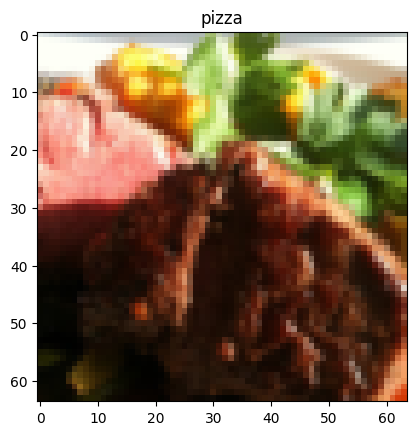

In [ ]:
plt.imshow(test_image.permute(1,2,0))
plt.title(class_names[np.argmax(pred)])
plt.show() # This actually showing the wrong prediction because have have not trained the model yet

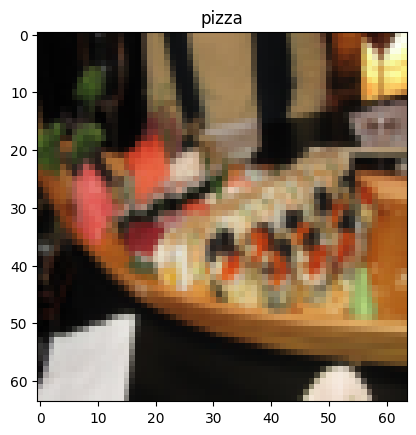

In [ ]:
# Lets try one more time with sushi
# Checking on a single image how the model is performing
test_image=Image.open("/content/test/sushi/1245193.jpg")
test_image=stack(test_image)
model_0.eval()
with torch.inference_mode():
  pred=model_0(test_image.unsqueeze(dim=0).to(device))
plt.imshow(test_image.permute(1,2,0))
plt.title(class_names[np.argmax(pred)])
plt.show() # This actually showing the wrong prediction because have have not trained the model yet

In [ ]:
# Our Random Model is prediction Pizza For every thing..., lets train the model and see
# But before the i need to do the same thing with the test data that i have done with the train data


In [ ]:
# Getting the path of all the images
all_images_test=[]
for i in os.listdir("/content/test/pizza"):
  all_images_test.append(stack(Image.open("/content/test/pizza/"+i)))
for j in os.listdir("/content/test/steak"):
  all_images_test.append(stack(Image.open("/content/test/steak/"+j)))
for k in os.listdir("/content/test/sushi"):
  all_images_test.append(stack(Image.open("/content/test/sushi/"+k)))

In [ ]:
test_labels=[0 for i in range(len(os.listdir("/content/test/pizza")))]+[1 for i in range(len(os.listdir("/content/test/steak")))]+[2 for i in range(len(os.listdir("/content/test/sushi")))]

In [ ]:
test_labels=[torch.tensor(label) for label in test_labels]

In [ ]:
dataset_test=torch.utils.data.TensorDataset(torch.stack(all_images_test),torch.stack(test_labels))

In [ ]:
test_dataloader=DataLoader(dataset_test,batch_size=75,shuffle=True)

steak


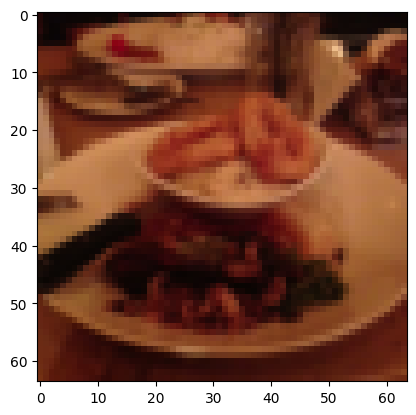

In [ ]:
# Checking the data loader
images,la=next(iter(test_dataloader))
plt.imshow(images[34].permute(1,2,0))
print(class_names[la[34]])

In [ ]:
# so we have both the train and the test data loader ready, lets train the model...

In [ ]:
pip install torchmetrics

In [ ]:
from torch import nn
import torch
import torchmetrics
accuracy_function = torchmetrics.Accuracy(task="multiclass",num_classes=3) # Metrics accuracy
loss_fun = nn.CrossEntropyLoss() # Loss Function Cross entropy generally used for multiclass classification
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1) # SGD we can also use Adam

In [ ]:
train_loss_list=[]
train_acc_list=[]
test_loss_list=[]
test_acc_list=[]
from tqdm.auto import tqdm
torch.manual_seed(42)
epochs=20
for epoch in tqdm(range(epochs)):
  train_loss,train_acc=0,0
  for batch,(X,y) in enumerate(dataloader):
    # Setting the model in train mode
    model_0.train()
    # Transfering everything to cpu
    model_0.to(device)
    X,y=X.to(device),y.to(device)
    y_pred=model_0(X)
    # 1. Forward Pass
    y_pred=model_0(X)
    # 2. Calculate the loss
    loss=loss_fun(y_pred,y)
    train_loss+=loss
    # Train Accuracy
    train_acc+=accuracy_function(y_pred,y)
    # 3. Optimizer Zero Grad
    optimizer.zero_grad()
    # 4. Loss Backward
    loss.backward()
    # 5. Optimizer Step
    optimizer.step()
  train_loss=train_loss/len(dataloader)
  train_acc=train_acc/len(dataloader)
  # Testing Mode
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for batch,(X,y) in enumerate(test_dataloader):
      # 1. Making Test Predictions
      test_pred=model_0(X)
      # 2. Calculate the loss
      loss=loss_fun(test_pred,y)
      test_loss+=loss
      # 3. Test Accuracy
      test_acc+=accuracy_function(test_pred,y)
    test_loss=test_loss/len(test_dataloader)
    test_acc=test_acc/len(test_dataloader)
  print(f"Train Loss {train_loss} | Test Loss {test_loss} | Test Accuracy {test_acc} | Train Accuracy{train_acc}")
  train_loss_list.append(train_loss)
  train_acc_list.append(train_acc)
  test_loss_list.append(test_loss)
  test_acc_list.append(test_acc)

  0%|          | 0/20 [00:00<?, ?it/s]

Train Loss 1.0847326517105103 | Test Loss 1.115135908126831 | Test Accuracy 0.3333333432674408 | Train Accuracy0.42578125
Train Loss 1.0840002298355103 | Test Loss 1.1175901889801025 | Test Accuracy 0.3333333432674408 | Train Accuracy0.42578125
Train Loss 1.1238104104995728 | Test Loss 1.100563406944275 | Test Accuracy 0.3333333432674408 | Train Accuracy0.3046875
Train Loss 1.0861808061599731 | Test Loss 1.1051756143569946 | Test Accuracy 0.3333333432674408 | Train Accuracy0.42578125
Train Loss 1.1171880960464478 | Test Loss 1.1081284284591675 | Test Accuracy 0.3333333432674408 | Train Accuracy0.3046875
Train Loss 1.110640048980713 | Test Loss 1.096791386604309 | Test Accuracy 0.3333333432674408 | Train Accuracy0.3046875
Train Loss 1.1022707223892212 | Test Loss 1.0901765823364258 | Test Accuracy 0.41333332657814026 | Train Accuracy0.3046875
Train Loss 1.0963129997253418 | Test Loss 1.0945950746536255 | Test Accuracy 0.3333333432674408 | Train Accuracy0.40234375
Train Loss 1.1019495725

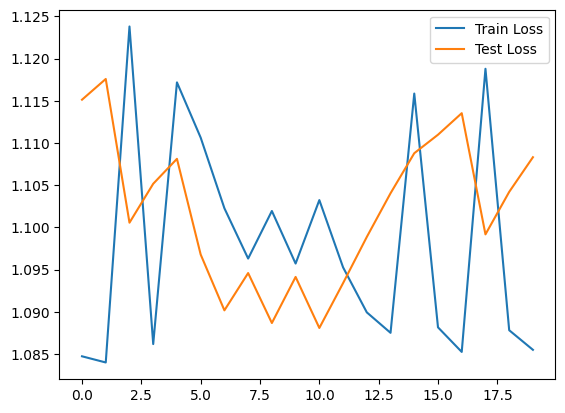

In [ ]:
plt.plot(torch.tensor(train_loss_list).detach().numpy(),label="Train Loss")
plt.plot(torch.tensor(test_loss_list).detach().numpy(),label="Test Loss")
plt.legend()
plt.show()

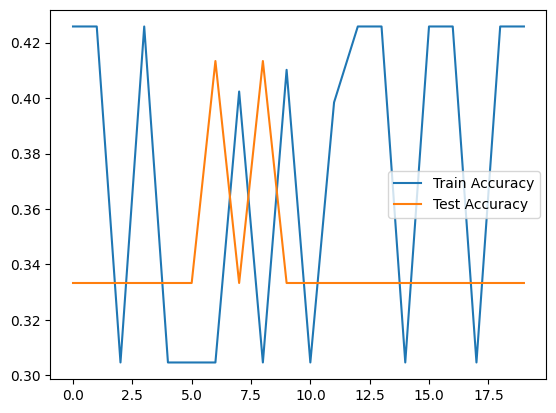

In [ ]:
plt.plot(torch.tensor(train_acc_list).detach().numpy(),label="Train Accuracy")
plt.plot(torch.tensor(test_acc_list).detach().numpy(),label="Test Accuracy")
plt.legend()
plt.show()

In [ ]:
# Very bad Model may be models complexity is not enough to capture the patterns in the data

In [ ]:
# How to check Models Summary?
from torchsummary import summary
summary(model_0,input_size=(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 64, 64]             280
              ReLU-2           [-1, 10, 64, 64]               0
            Conv2d-3           [-1, 10, 64, 64]             910
              ReLU-4           [-1, 10, 64, 64]               0
         MaxPool2d-5           [-1, 10, 32, 32]               0
            Conv2d-6           [-1, 10, 32, 32]             910
              ReLU-7           [-1, 10, 32, 32]               0
            Conv2d-8           [-1, 10, 32, 32]             910
              ReLU-9           [-1, 10, 32, 32]               0
        MaxPool2d-10           [-1, 10, 16, 16]               0
          Flatten-11                 [-1, 2560]               0
           Linear-12                    [-1, 3]           7,683
Total params: 10,693
Trainable params: 10,693
Non-trainable params: 0
---------------------------------